<a href="https://colab.research.google.com/github/DSjeongmin/Kaggle/blob/main/%5Bkaggle%5D%5BBike_Sharing_Demand%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA & FE

Feature
* datetime - 시간별 날짜
* season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* holiday - 하루가 휴일로 간주되는지 여부
* workingday - 주말과 휴일이 아닌 일하는 날
* weather
  * 1 : 맑음, 구름 조금, 흐림
  * 2 : 안개 + 흐림, 안개 + 구름, 안개 + 구름이 거의 없음 + 흐림
  * 3 : 가벼운 눈, 가벼운 비 + 천둥 + 구름, 가벼운 비 + 구름
  * 4 : 폭우 + 우박 + 천둥 + 안개, 눈 + 안개
* temp - 섭씨 온도
* atemp - 섭씨 온도의 느낌
* humidity - 상대 습도
* windspeed - 풍속
* casual - 미등록 사용자 대여수
* registered - 등록된 사용자 대여수
* count - 총 대여수

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

train = pd.read_csv('/content/drive/MyDrive/Kaggle/bike/bike_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/bike/bike_test.csv')

In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

* target 변수 확인

In [10]:
from scipy import stats
from scipy.stats import norm

target = train['count']

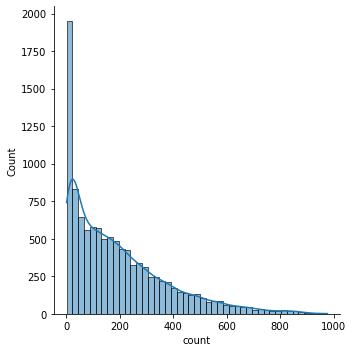

In [11]:
import seaborn as sns
sns.displot(train['count'],kde=True)

# 왼쪽으로 치우쳐져 있는 결과 확인 가능 -> 역변환 필요할 것 같음.

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977])),
 (169.82942673231386, 191.5741319125482, 0.9372682766213176))

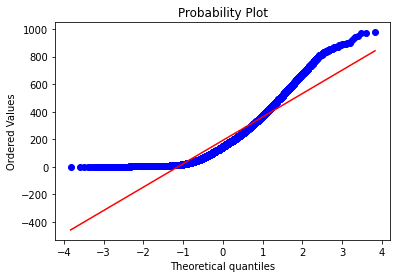

In [12]:
stats.probplot(train['count'], plot=plt)

# 그래프 결과 정규성을 띄우지 않으므로 Box-Cox 변환 해야한다.
# Box-Cox 변환 - 데이터를 정규분포에 가깝게 만들거나 데이터의 분산 안정화 하는 것
#              - 정규성을 가정한 분석법을 적용하기에 앞서 데이터의 전처리에 사용

In [13]:
# Box-Cox 변환 - 정규성을 띄게 만들어 줌.

# 라이브러리 활용 방식
# from scipy.stats import boxcox
# stats.boxcox(train['count']) 

# 수식 적용 방식
train['log_count'] = np.log(target+1)

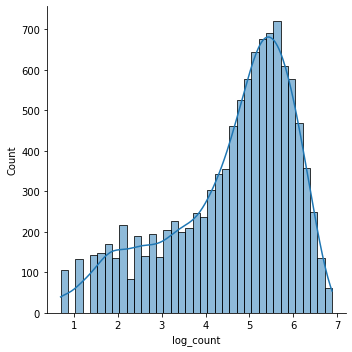

In [21]:
sns.displot(train['log_count'],kde=True)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.364739645924417, 4.591363690454027, 0.9611793780126949))

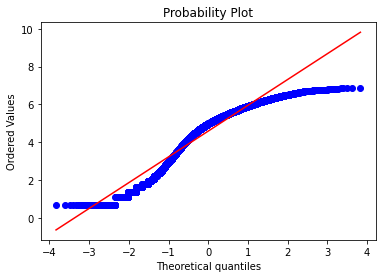

In [15]:
stats.probplot(train['log_count'], plot=plt)

# Box-Cox 변환 후 왜도 편중을 조금 줄였다.

* 데이터 병합

In [22]:
feature_names = list(test)
df_train = train[feature_names]
df = pd.concat((df_train,test))
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [25]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.3+ MB


* datetime

In [26]:
import datetime
tmp = pd.to_datetime(train['datetime'])

In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['weekend'] = (df['dayofweek']==5) | (df['dayofweek']==6)

In [28]:
df.drop(['datetime'],axis=1, inplace=True)

In [29]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['weekend'] = (train['dayofweek']==5) | (train['dayofweek']==6)

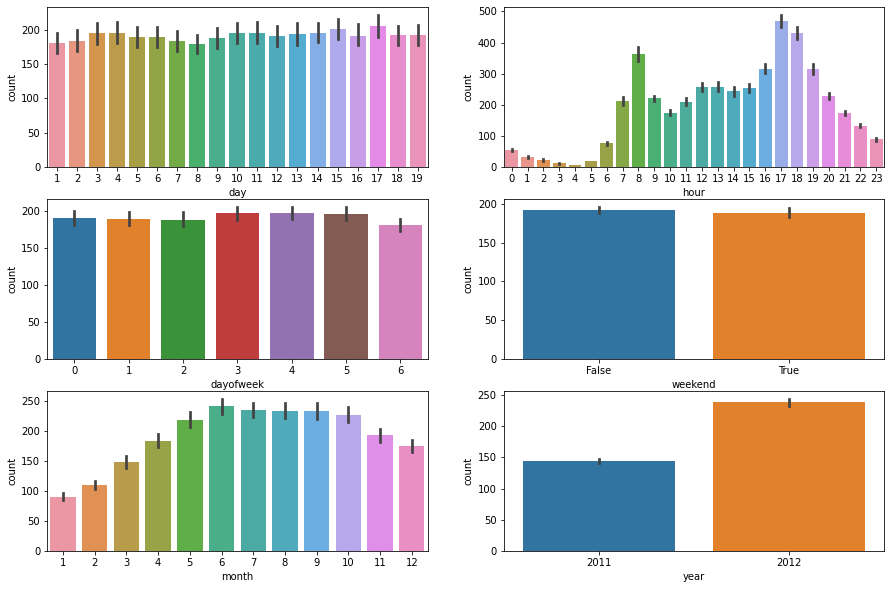

In [30]:
figure, axs = plt.subplots(3,2,figsize=(15,10))

sns.barplot(data=train, x='day', y=target, ax=axs[0][0])
sns.barplot(data=train, x='hour', y=target, ax=axs[0][1])
sns.barplot(data=train, x='dayofweek', y=target, ax=axs[1][0])
sns.barplot(data=train, x='weekend', y=target, ax=axs[1][1])
sns.barplot(data=train, x='month', y=target, ax=axs[2][0])
sns.barplot(data=train, x='year', y=target, ax=axs[2][1])

# 시간대별 그래프 파악시 출퇴근 시간에 대여량이 많은 것으로 보임.
# 월별 그래프 파악시 여름에 대여량이 많은 것으로 보임.
# 2012년도에 대여량이 늘어난 것으로 보임.

In [31]:
# 일별 대여량 별다른 특징이 없으므로 드롭.
df = df.drop(['day'],axis=1)

* Season

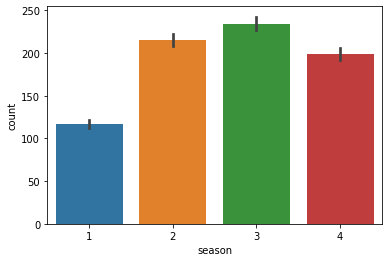

In [32]:
sns.barplot(data=df[:len(train)], x='season', y=target)

In [33]:
# Category 형식이라 모델링을 위해 더미변수화 
season_encoded = pd.get_dummies(df['season'], prefix = 'season')
df = pd.concat((df,season_encoded),axis=1)
df = df.drop(['season'],axis=1)
df.head(3)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,dayofweek,month,year,weekend,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0,0,5,1,2011,True,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0,1,5,1,2011,True,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0,2,5,1,2011,True,1,0,0,0


* holiday

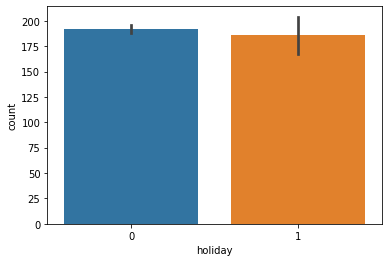

In [34]:
sns.barplot(data=df[:len(train)], x='holiday', y=target)

# 데이터 파악시 카테고리 데이터로 봐야 할 것 같음.

* Workingday

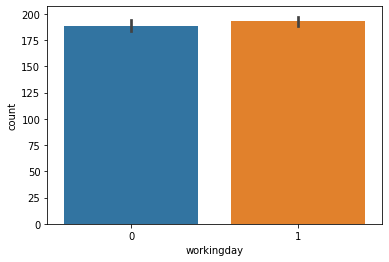

In [35]:
sns.barplot(data=df[:len(train)], x='workingday', y=target)

# 데이터 파악시 카테고리 데이터로 봐야 할 것 같음.

* Weather

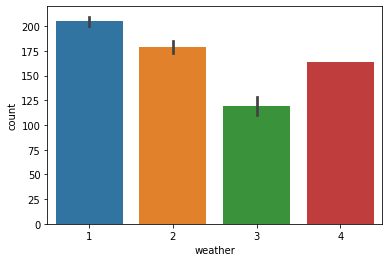

In [36]:
sns.barplot(data=df[:len(train)], x='weather', y=target)

In [37]:
# Weather 컬럼 데이터가 카테고리 형식 데이터라 더미변수로 변환

weather_encoded = pd.get_dummies(df['weather'],prefix='weather')
df = pd.concat((df,weather_encoded),axis=1)
df = df.drop(['weather'], axis = 1)
df.head(3)

,holiday,workingday,temp,atemp,humidity,windspeed,hour,dayofweek,month,year,weekend,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,0,5,1,2011,True,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,1,5,1,2011,True,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,2,5,1,2011,True,1,0,0,0,1,0,0,0


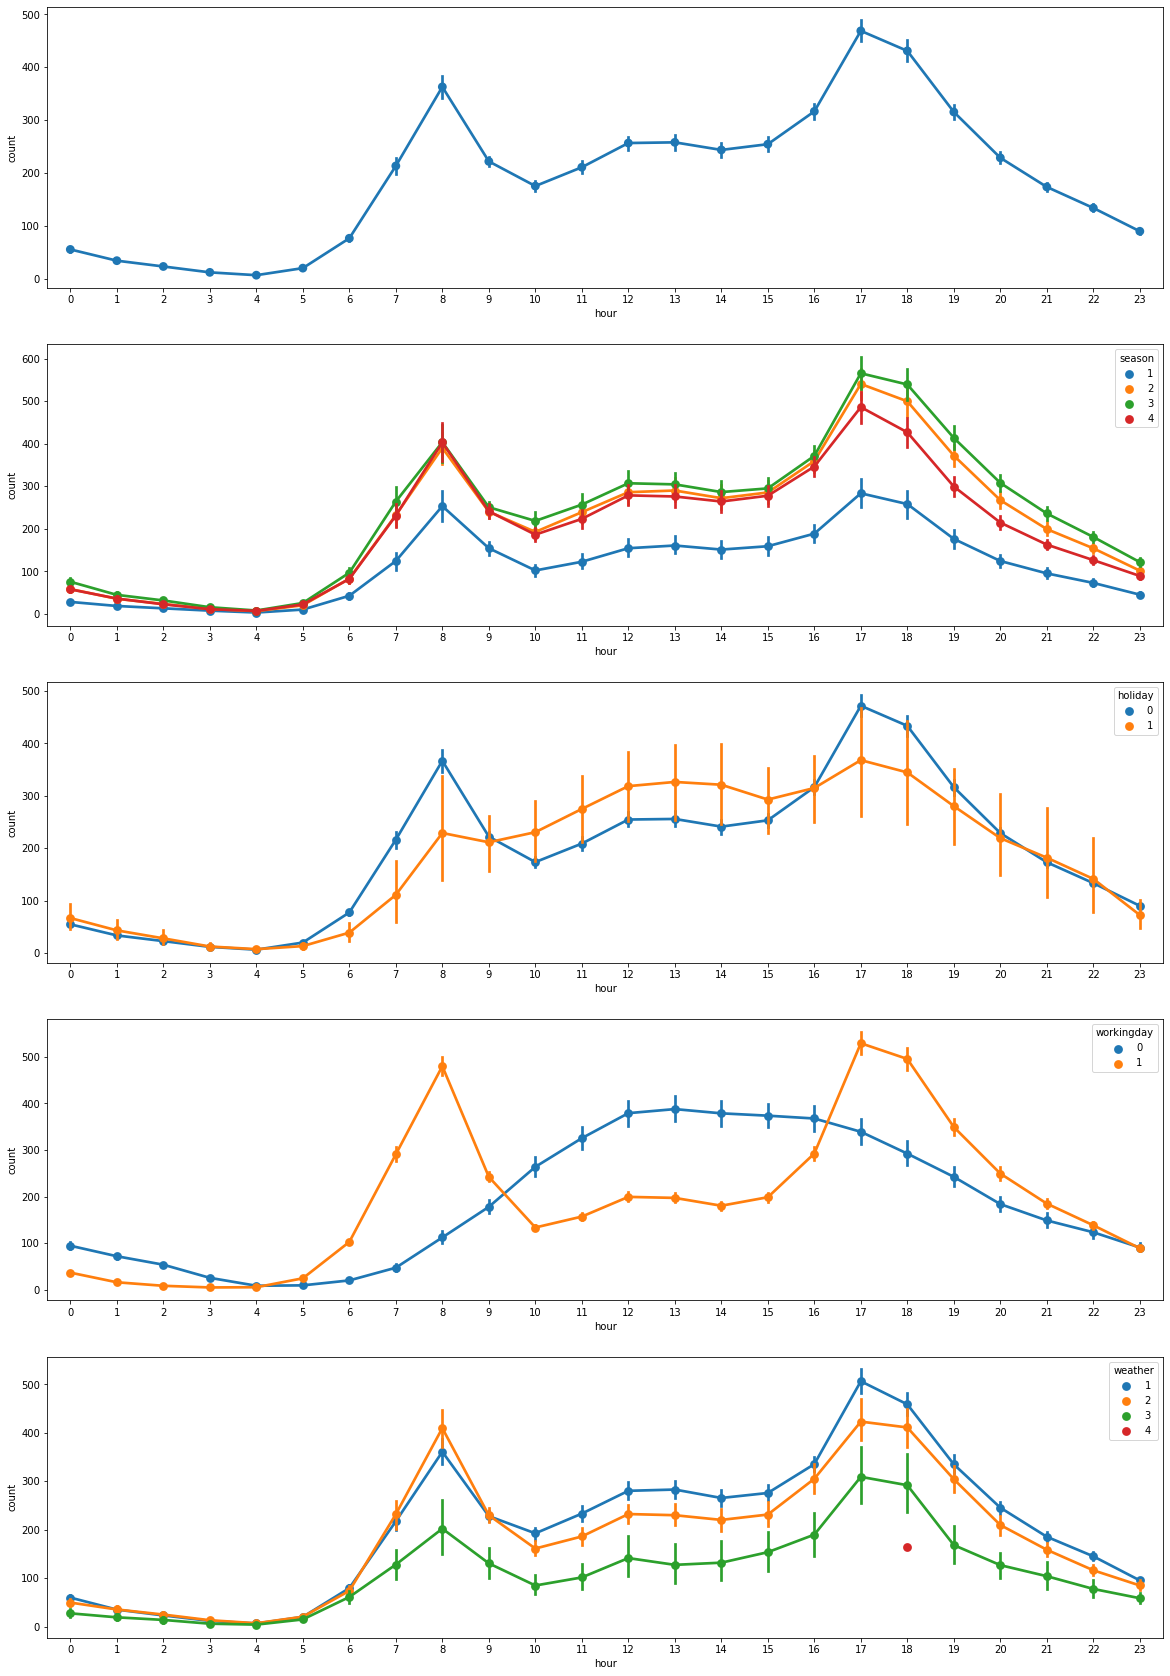

In [38]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(20,30)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='season',ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='holiday',ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='workingday',ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='weather',ax=ax5)

* 1번 그래프 - 출퇴근 시간에 대여량 높은 것 파악됨.
* 2번 그래프 - 봄에 대여량이 낮은 것 파악됨.
* 3번 그래프 - 쉬는날에는 출퇴근 시간에도 대여량이 높지 않은 것이 파악됨.
* 4번 그래프 - 일하는 날 출,퇴근 시간에 대여량이 높고 / 일하지 않는 날은 낮시간에 대여량이 많음.
* 5번 그래프 - 맑은 날 가장 높은 대여량을 보이며, 날이 안좋은 경우에는 대여량이 거의 없다고 파악됨.

* 왜도 확인

In [39]:
from scipy.stats import skew
skew = df.apply(lambda x:skew(x))
skew.sort_values(ascending = False)

weather_4     76.092051
holiday        5.638051
weather_3      3.055531
season_4       1.195185
season_1       1.191551
season_2       1.132099
season_3       1.102009
weather_2      1.085650
weekend        0.933592
windspeed      0.574856
temp          -0.006020
dayofweek     -0.009235
month         -0.009252
year          -0.010242
hour          -0.010679
atemp         -0.090421
humidity      -0.111278
weather_1     -0.660109
workingday    -0.785190
dtype: float64

In [40]:
skew = skew[abs(skew) > 0.5]
skew

holiday        5.638051
workingday    -0.785190
windspeed      0.574856
weekend        0.933592
season_1       1.191551
season_2       1.132099
season_3       1.102009
season_4       1.195185
weather_1     -0.660109
weather_2      1.085650
weather_3      3.055531
weather_4     76.092051
dtype: float64

* 상관도

In [45]:
cor = train.iloc[:,1:-1].corr()
# cor.head(3)

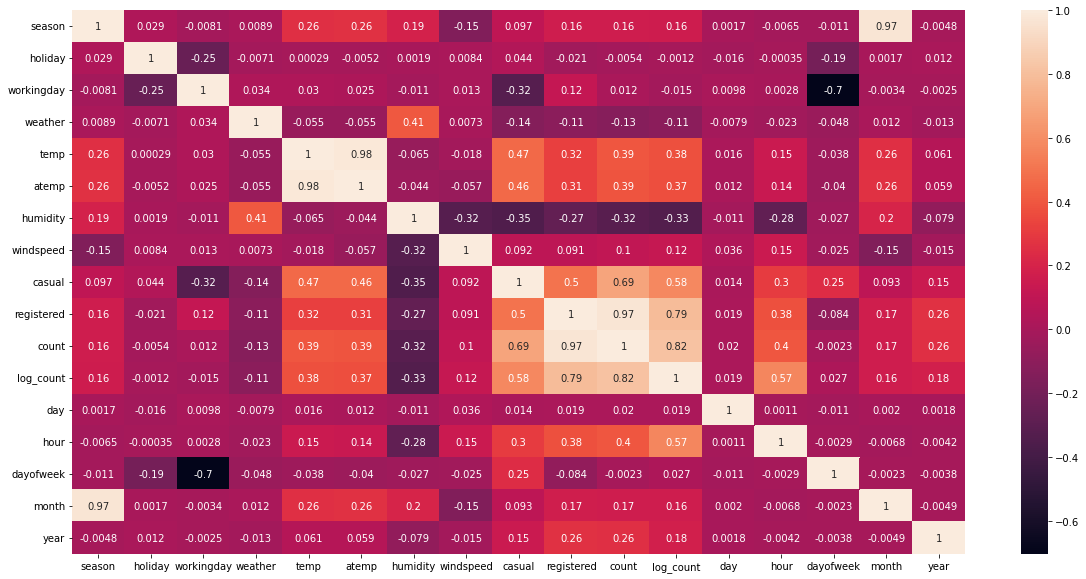

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, annot=True)

# temp, atemp 상관관계가 높아 다중공선서 파악 해야함.

* 다중공선성

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = df.iloc[:,:6]
vif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     17379 non-null  int64  
 1   workingday  17379 non-null  int64  
 2   temp        17379 non-null  float64
 3   atemp       17379 non-null  float64
 4   humidity    17379 non-null  int64  
 5   windspeed   17379 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 950.4 KB


In [48]:
vif = pd.DataFrame()
vif['Feature'] = vif_data.columns
vif['vif'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif.sort_values(by='vif', ascending=False)

# vif가 10 이상이면 다중공선성이 존재한다고 하는데 atemp와 temp에 다중공선성 문제가 보임.
# => 주성분 분석으로 차원을 줄여보려고 함.

,Feature,vif
3,atemp,342.955195
2,temp,316.903766
4,humidity,6.362670
1,workingday,3.167607
5,windspeed,2.782781
0,holiday,1.085231


* PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(df[['temp','atemp']])

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.explained_variance_ratio_

array([0.99388034])

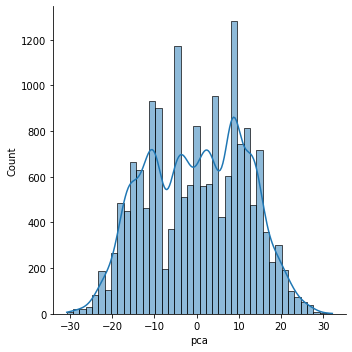

In [52]:
df['pca'] = pca.fit_transform(df[['temp','atemp']])
sns.displot(df['pca'], kde=True)

# distplot결과 파생변수인 pca는 정규분포를 따르고 있다고 본다.

* 수치형 변수

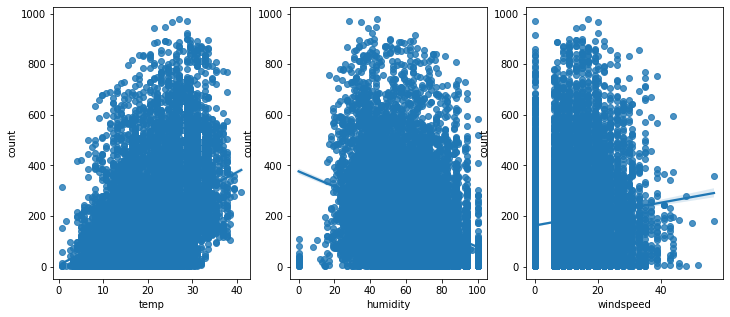

In [53]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(12,5)
sns.regplot(train['temp'], 'count', data=train, ax=ax1)
sns.regplot(train['humidity'], 'count', data=train, ax=ax2)
sns.regplot(train['windspeed'], 'count', data=train, ax=ax3)

In [55]:
# pearson 상관관계 분석
print(stats.pearsonr(train['temp'], target))
print(stats.pearsonr(train['humidity'], target))
print(stats.pearsonr(train['windspeed'], target))

(0.3944536449672492, 0.0)
(-0.3173714788765946, 2.921541663750899e-253)
(0.10136947021033282, 2.898407203170783e-26)


* windspeed

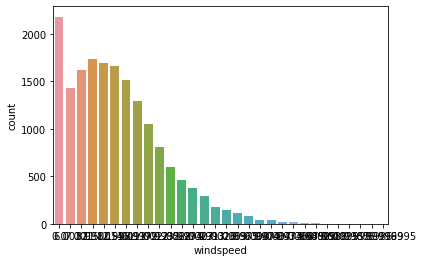

In [56]:
# windspeed 데이터가 0쪽에 많이 몰려있음
sns.countplot(data=df, x='windspeed')

In [57]:
# 풍속 0인경우 평균값 대체
df.loc[df['windspeed']==0, 'windspeed'] = df['windspeed'].mean()

* 범주형 변수

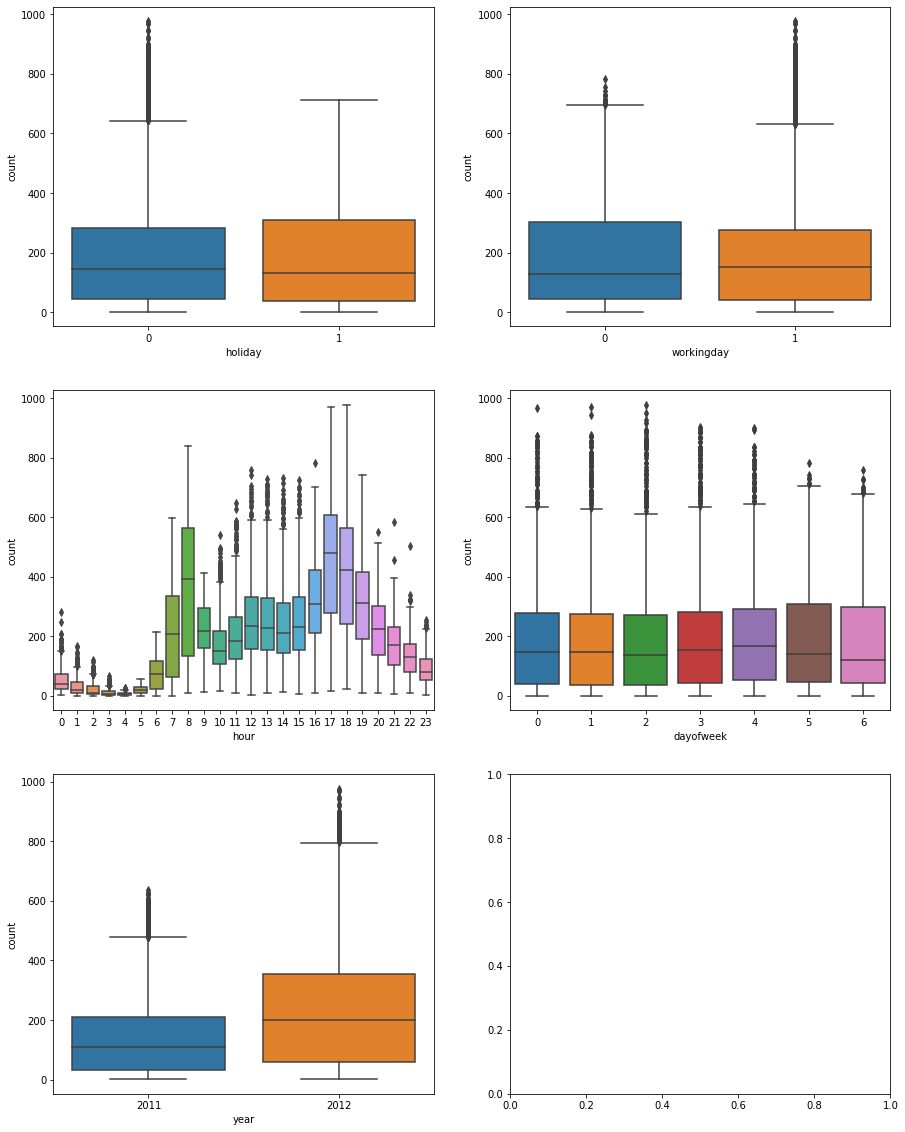

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
sns.boxplot(data = train, y='count', x='holiday', orient='v', ax =axes[0][0] )
sns.boxplot(data = train, y='count', x='workingday', orient='v', ax =axes[0][1] )
sns.boxplot(data = train, y='count', x='hour', orient='v', ax =axes[1][0] )
sns.boxplot(data = train, y='count', x='dayofweek', orient='v', ax =axes[1][1] )
sns.boxplot(data = train, y='count', x='year', orient='v', ax =axes[2][0] )

Modeling

In [59]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [60]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [61]:
target = train['log_count']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2, shuffle=False, random_state=7)

* RMSLE 함수 - gridsearch시 rmsle는 score에 없으므로 모델 성능 평가위해 만듬

In [63]:
def rmsle_score(preds, true):
  rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
  return rmsle_score

In [64]:
from sklearn.metrics.scorer import make_scorer
RMSLE = make_scorer(rmsle_score)

* 단순선형회귀

In [65]:
import statsmodels.api as sm
model = sm.OLS(target.values, new_train.astype('float'))
re = model.fit()
re.summary()

# 결정계수, 수정된 결정계수 수치 파악시 모델의 설명력은 0.5가까이 된다.
# p-value가 유의수준 0.05보다 낮았다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     671.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        06:24:56   Log-Likelihood:                -15517.
No. Observations:               10886   AIC:                         3.107e+04
Df Residuals:                   10869   BIC:                         3.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       -0.5188      0.050    -10.331      0.000      -0.617      -0.420
workingday    -0.5740      0.035    -16.615      0.000      -0.642      -0.506
temp         -17.8523      0.847    -21.066      0.000     -19.513     -16.191
atemp        -19.4690      0.923    -21.098      0.000     -21.278     -17.660
humidity      -0.0137      0.001    -21.607      0.000      -0.015      -0.012
windspeed      0.0042      0.002      2.640      0.008       0.001       0.007
hour           0.0976      0.001     65.334      0.000       0.095       0.101
dayofweek      0.0315      0.008      3.887      0.000       0.016       0.047
month          0.0682      0.012      5.689      0.000       0.045       0.092
year           0.4138      0.020     21.191      0.000       0.375       0.452
weekend       -0.5960      0.042    -14.359      0.000      -0.677      -0.515
season_1      -0.3115      0.062     -5.051      0.000      -0.432      -0.191
season_2      -0.3360      0.032    -10.494      0.000      -0.399      -0.273
season_3      -0.6674      0.035    -18.857      0.000      -0.737      -0.598
season_4      -0.3740      0.061     -6.137      0.000      -0.493      -0.255
weather_1     -0.6744      0.253     -2.666      0.008      -1.170      -0.179
weather_2     -0.5300      0.253     -2.095      0.036      -1.026      -0.034
weather_3     -0.9011      0.254     -3.549      0.000      -1.399      -0.403
weather_4      0.4166      0.757      0.551      0.582      -1.067       1.900
pca           26.4536      1.253     21.118      0.000      23.998      28.909
==============================================================================
Omnibus:                      120.148   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.950
Skew:                          -0.261   Prob(JB):                     1.22e-27
Kurtosis:                       3.021   Cond. No.                     2.49e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Lasso

In [66]:
params = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

In [67]:
lasso = make_pipeline(GridSearchCV(Lasso(random_state=1), params, cv=10, scoring=RMSLE))

In [68]:
lasso.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=1,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                              iid='deprecated', n_jobs=None,
                              param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.8,
                                                    1],
                                          'normalize': [True, False],
                                          'tol': [1e-06, 1e-05, 5e-05, 0.0001,
                                                  0.0005, 0.001]},
                         

In [69]:
la_ytest = lasso.predict(X_test)

In [70]:
s_lasso  = rmsle_score(la_ytest, y_test)
s_lasso

0.27941826544853987

In [71]:
pred_la = lasso.predict(new_test)

* ElasticNet

In [72]:
param_e = {'alpha' : [0.1,1.0,10], 'max_iter':[1000000], 'l1_ratio':[0.04,0.05],
           'normalize':[True, False]}

In [73]:
Enet = make_pipeline(GridSearchCV(ElasticNet(random_state=1), param_e, cv=10, scoring=RMSLE))

In [74]:
Enet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=1,
                                                   selection='cyclic',
                                                   tol=0.0001,
                                                   warm_start=False),
                              iid='deprecated', n_jobs=None,
                              param_grid={'alpha': [0.1, 1.0, 10],
                                          'l1_ratio': [0.04, 0

In [75]:
Enet_ytest = Enet.predict(X_test)

In [76]:
s_Enet = rmsle_score(Enet_ytest, y_test)
s_Enet

0.27941826544853987

In [77]:
pred_Enet = Enet.predict(new_test)

* RandomForestRegressor

In [78]:
param_RF = {'min_samples_split' : [3,4,6,10], 'n_estimators': [70,100], 'random_state':[5]}

In [79]:
RF = make_pipeline(GridSearchCV(RandomForestRegressor(random_state=1), param_RF, cv=10, scoring=RMSLE))

In [80]:
RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_s

In [81]:
RF_ytest = RF.predict(X_test)
s_RF = rmsle_score(RF_ytest, y_test)
s_RF

0.08390008122091601

In [82]:
pred_RF = RF.predict(new_test)

* GradientBoostingRegressor

In [83]:
param_GB = {'learning_rate':[1,0.1,0.01,0.001],
            'n_estimators':[50,100,200,500,1000]}

In [84]:
GB = make_pipeline(GridSearchCV(GradientBoostingRegressor(random_state=1), param_GB, 
                                cv=10, scoring=RMSLE))

In [85]:
GB.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=GradientBoostingRegressor(alpha=0.9,
                                                                  ccp_alpha=0.0,
                                                                  criterion='friedman_mse',
                                                                  init=None,
                                                                  learning_rate=0.1,
                                                                  loss='ls',
                                                                  max_depth=3,
                                                                  max_features=None,
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                          

In [86]:
GB_ytest = GB.predict(X_test)
s_GB = rmsle_score(GB_ytest, y_test)
s_GB

0.2703811258634363

In [87]:
pred_GB = GB.predict(new_test)

* LGBMRegressor

In [88]:
param_lgb = param_grid = [{
    'n_estimators' : [400,700,1000],
    'max_depth' : [15.20,25],
    'num_leaves' : [50,100,200],
    'min_split_gain' : [0.3,0.4]
}]

In [89]:
lgb = make_pipeline(GridSearchCV(LGBMRegressor(verbose_eval=False, random_state=1), param_lgb,cv=10, scoring=RMSLE))

In [90]:
lgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=LGBMRegressor(boosting_type='gbdt',
                                                      class_weight=None,
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                      objective=No

In [91]:
lgb_ytest = lgb.predict(X_test)
s_lgb = rmsle_score(lgb_ytest, y_test)
s_lgb

0.07810197805886362

In [92]:
pred_lgb = lgb.predict(new_test)

* 모델 비교

In [93]:
list_scores = [s_lasso, s_Enet, s_RF, s_GB, s_lgb]
list_regressors = ['Lasso','Enet','RF','GB','lgb']

Text(0, 0.5, 'RMSLE')

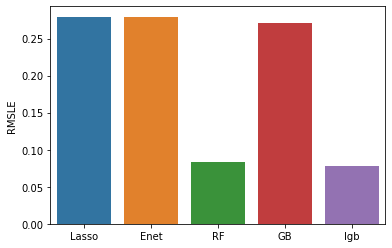

In [94]:
sns.barplot(x=list_regressors, y=list_scores)
plt.ylabel('RMSLE')

In [95]:
predictions = {'Lasso':pred_la, 
               'ElaNet' : pred_Enet,
               'RF' : pred_RF,
               'GB' : pred_GB,
               'lgb' : pred_lgb
               }

In [96]:
df_predictions = pd.DataFrame(data = predictions )
df_predictions.corr()

,Lasso,ElaNet,RF,GB,lgb
Lasso,1.000000e+00,1.000000e+00,-4.693924e-16,9.681474e-13,5.095733e-15
ElaNet,1.000000e+00,1.000000e+00,-4.693924e-16,9.681474e-13,5.095733e-15
RF,-4.693924e-16,-4.693924e-16,1.000000e+00,8.836236e-01,9.931087e-01
GB,9.681474e-13,9.681474e-13,8.836236e-01,1.000000e+00,8.828826e-01
lgb,5.095733e-15,5.095733e-15,9.931087e-01,8.828826e-01,1.000000e+00


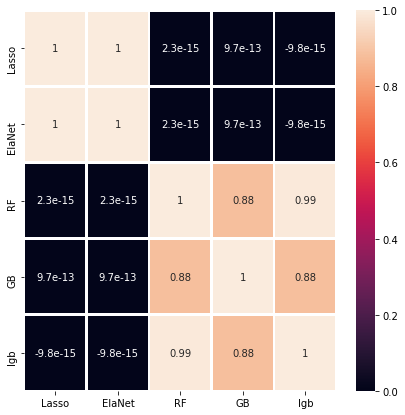

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True)

# lGB / RF 상관관계가 높게 나온다. => 앙상블을 통해 예측

예측

In [97]:
# RF
RF.fit(new_train, target)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_s

In [98]:
log_pred = RF.predict(new_test)
predictions = np.exp(log_pred)-1

In [99]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = predictions
sub.head()

,datetime,count
0,2011-01-20 00:00:00,11.637560
1,2011-01-20 01:00:00,5.034908
2,2011-01-20 02:00:00,3.189926
3,2011-01-20 03:00:00,3.365977
4,2011-01-20 04:00:00,2.871120


In [100]:
# RF sub
sub.to_csv('submission.csv', index=False)

In [101]:
# Lgb
lgb.fit(new_train, target)

Pipeline(memory=None,
         steps=[('gridsearchcv',
                 GridSearchCV(cv=10, error_score=nan,
                              estimator=LGBMRegressor(boosting_type='gbdt',
                                                      class_weight=None,
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                      objective=No

In [102]:
log_pred_lgb = lgb.predict(new_test)
predictions_lgb = np.exp(log_pred_lgb)-1

In [103]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = predictions_lgb
sub.head()

,datetime,count
0,2011-01-20 00:00:00,8.824765
1,2011-01-20 01:00:00,3.804892
2,2011-01-20 02:00:00,2.780951
3,2011-01-20 03:00:00,2.417506
4,2011-01-20 04:00:00,2.155747


In [104]:
# RF sub
sub.to_csv('submission.csv', index=False)

In [105]:
# 앙상블
ensemble = (0.6*predictions + 0.4*predictions_lgb)

In [106]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = ensemble
sub.head()

,datetime,count
0,2011-01-20 00:00:00,10.512442
1,2011-01-20 01:00:00,4.542902
2,2011-01-20 02:00:00,3.026336
3,2011-01-20 03:00:00,2.986589
4,2011-01-20 04:00:00,2.584971


In [109]:
# ensemble sub
sub.to_csv('submission.csv', index=False)